In [1]:
import pandas as pd
import numpy as np

df=pd.read_excel("DadRegLis2.xlsx", sheet_name="exer15")
df.head()

,Tipo,Chumbo
0,Ind,109.47
1,Ind,105.62
2,Ind,106.12
3,Ind,86.73
4,Ind,95.15


In [2]:
df.describe()

,Chumbo
count,15.000000
mean,58.591333
std,32.541367
min,21.210000
25%,35.250000
50%,41.720000
75%,90.940000
max,109.470000


In [3]:
df_encoded = pd.get_dummies(df, columns=['Tipo'], prefix='Tipo')
df_encoded.head()

,Chumbo,Tipo_Ind,Tipo_Res,Tipo_Rur
0,109.47,True,False,False
1,105.62,True,False,False
2,106.12,True,False,False
3,86.73,True,False,False
4,95.15,True,False,False


## a)

In [4]:
descriptive_stats = df.groupby('Tipo')['Chumbo'].describe()

print(descriptive_stats)

      count     mean       std    min    25%     50%     75%     max
Tipo                                                                
Ind     5.0  100.618  9.439617  86.73  95.15  105.62  106.12  109.47
Res     5.0   45.720  9.295319  39.34  40.79   41.72   44.79   61.96
Rur     5.0   29.436  7.304165  21.21  25.14   29.09   31.16   40.58


The analysis suggests that the average amount of lead varies per soil type, with industrial soil containing the highest average while residencial and rural soils having moderate and low average amounts respectively

## b)

In [7]:
df_encoded=df_encoded.astype(float)

In [8]:
import statsmodels.api as sm

y = df_encoded['Chumbo']  
X = df_encoded.drop(columns=['Chumbo','Tipo_Rur'])  

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Chumbo   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     91.17
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           5.54e-08
Time:                        18:36:52   Log-Likelihood:                -52.119
No. Observations:                  15   AIC:                             110.2
Df Residuals:                      12   BIC:                             112.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4360      3.906      7.536      0.0

c:\Users\hugog\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The coefficients for Tipo_Ind and Tipo_Res indicate the average increase in the average quantity of lead when considering the Industrial and Residential soil instead of the Rural one, while the constant intercept is the average quantity of lead for the Rural soil (and given that the Rural soil has the smallest average amount of lead, it is also the minimum average amount of lead for all soils)

## c)

The average quantity of lead does vary for going from the Rural soil to the Industrial one, while the same cannot be said for going from the Rural soil to the Residential one when assuming $\alpha=0.01$

## d)

In [9]:
from statsmodels.stats.multitest import multipletests

# Get the p-values for the t-tests on each coefficient
p_values = model.pvalues

# Display individual t-test results without adjustment
print("Individual t-test p-values for each coefficient (without adjustment):")
print(p_values)

# Apply Bonferroni correction to control the family-wise error rate
alpha = 0.01  # Global significance level
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='bonferroni')

print("\nAdjusted p-values after Bonferroni correction:")
print(pvals_corrected)

# Conclusion for each test
for i, (rej, pval) in enumerate(zip(reject, pvals_corrected)):
    variable_name = p_values.index[i]
    print(f"Test for {variable_name}: {'Reject H0' if rej else 'Fail to reject H0'}, p-value (adjusted) = {pval:.4f}")

Individual t-test p-values for each coefficient (without adjustment):
const       6.894210e-06
Tipo_Ind    2.178328e-08
Tipo_Res    1.219264e-02
dtype: float64

Adjusted p-values after Bonferroni correction:
[2.06826298e-05 6.53498358e-08 3.65779221e-02]
Test for const: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Ind: Reject H0, p-value (adjusted) = 0.0000
Test for Tipo_Res: Fail to reject H0, p-value (adjusted) = 0.0366


## e)

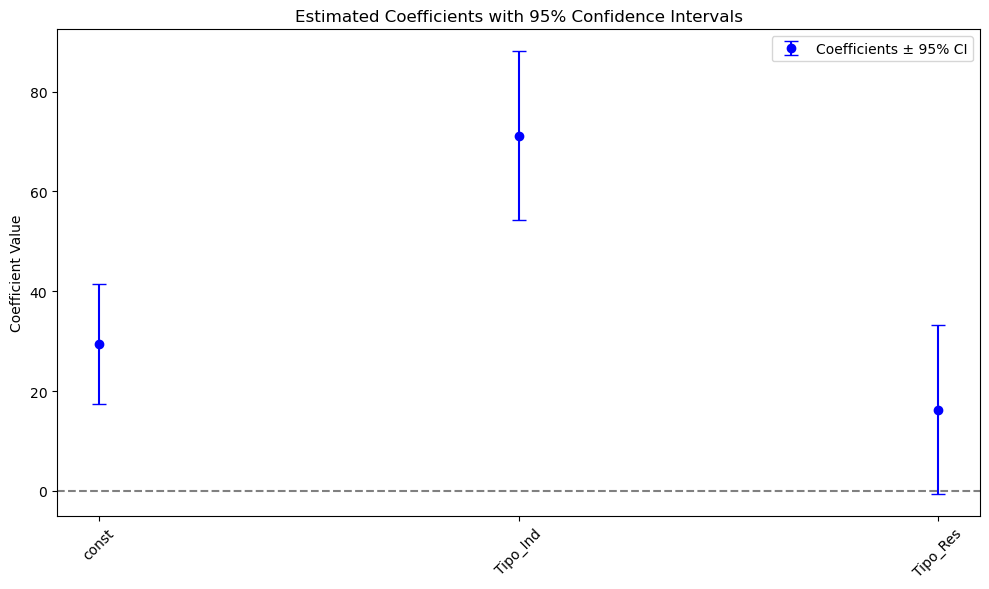

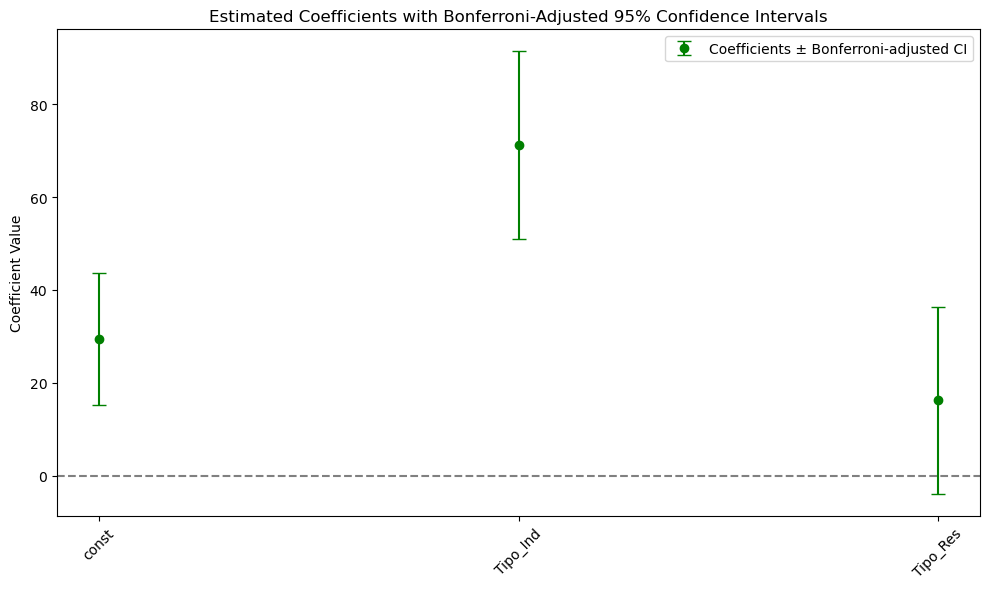

In [10]:
import matplotlib.pyplot as plt

# Visualizing the coefficients with confidence intervals
conf_intervals = model.conf_int(alpha=alpha)
coefficients = model.params

plt.figure(figsize=(10, 6))
plt.errorbar(conf_intervals.index, coefficients, 
             yerr=[coefficients - conf_intervals[0], conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='blue', label='Coefficients ± 95% CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()


# Applying Bonferroni adjustment to the confidence intervals
# Calculate the Bonferroni-adjusted alpha level
adjusted_alpha = alpha / len(coefficients)  # Bonferroni adjustment divides alpha by the number of tests

# Calculate the Bonferroni-adjusted confidence intervals
bonferroni_conf_intervals = model.conf_int(alpha=adjusted_alpha)

# Visualizing the coefficients with Bonferroni-adjusted confidence intervals
plt.figure(figsize=(10, 6))
plt.errorbar(bonferroni_conf_intervals.index, coefficients, 
             yerr=[coefficients - bonferroni_conf_intervals[0], bonferroni_conf_intervals[1] - coefficients], 
             fmt='o', capsize=5, color='green', label='Coefficients ± Bonferroni-adjusted CI')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients with Bonferroni-Adjusted 95% Confidence Intervals')
plt.tight_layout()
plt.legend()
plt.show()


## f)

Correlation matrix of estimated betas:
             const  Tipo_Ind  Tipo_Res
const     1.000000 -0.707107 -0.707107
Tipo_Ind -0.707107  1.000000  0.500000
Tipo_Res -0.707107  0.500000  1.000000


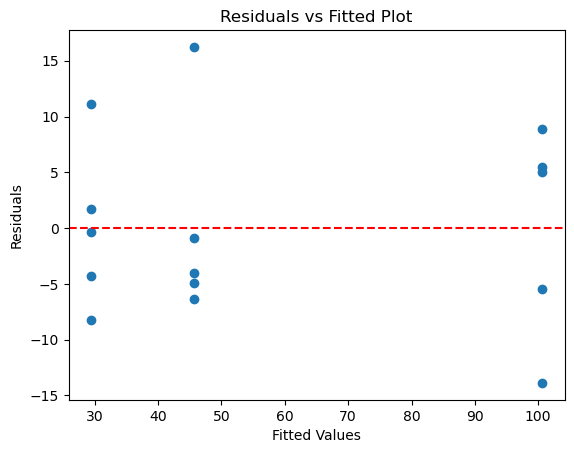

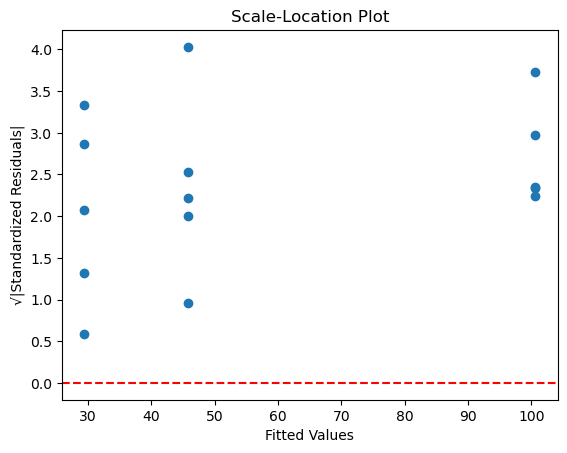

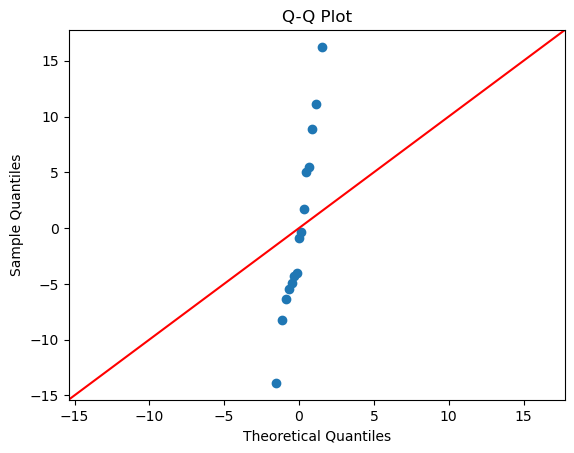

Shapiro-Wilk test statistic: 0.9709, p-value: 0.8718
Fail to reject the null hypothesis: Residuals appear to be normally distributed.
Anderson-Darling test statistic: 0.2601
Critical values and significance levels:
Significance level: 15.0%, Critical value: 0.498
Fail to reject the null hypothesis at the 15.0% significance level.
Significance level: 10.0%, Critical value: 0.568
Fail to reject the null hypothesis at the 10.0% significance level.
Significance level: 5.0%, Critical value: 0.681
Fail to reject the null hypothesis at the 5.0% significance level.
Significance level: 2.5%, Critical value: 0.794
Fail to reject the null hypothesis at the 2.5% significance level.
Significance level: 1.0%, Critical value: 0.945
Fail to reject the null hypothesis at the 1.0% significance level.
Jarque-Bera test statistic: 0.5389, p-value: 0.7638
Fail to reject the null hypothesis: Residuals appear to be normally distributed.


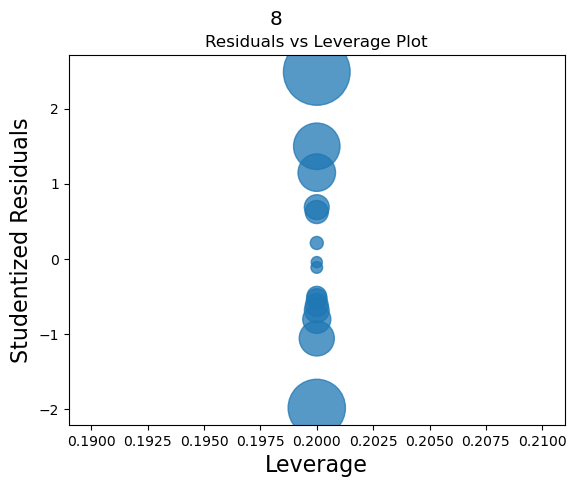

    Feature       VIF
0     const  3.000000
1  Tipo_Ind  1.333333
2  Tipo_Res  1.333333


c:\Users\hugog\Desktop\Mestrado - Matérias\Regression Models\Linear_Regression_Diagnostics.py:75: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


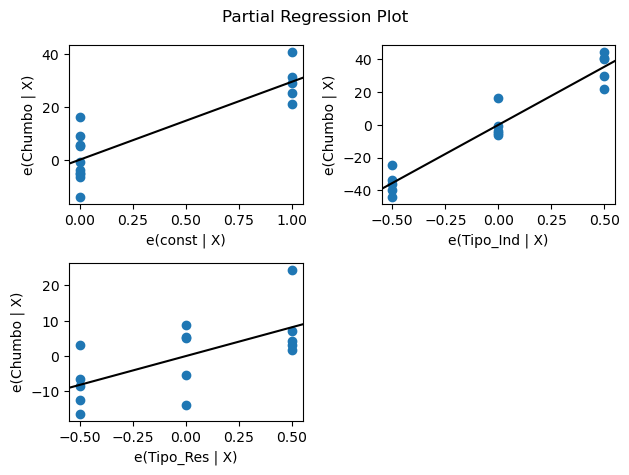

Breusch-Pagan test p-value: 0.7936
Result: Fail to reject the null hypothesis. There is no evidence of heteroscedasticity in the residuals.
White test p-value: 0.7936
Result: Fail to reject the null hypothesis. There is no evidence of heteroscedasticity in the residuals.


In [11]:
from Linear_Regression_Diagnostics import model_diagnostics

model_diagnostics(model, X, y)

The diagnostics seem to show that the model is fine and the conclusions are thus correct